# Deep Learning Using R with keras (CNN)

In this notebook, we will walk through how to use the keras R package for a toy example in deep learning with the hand written digits image dataset (i.e. MNIST). The purpose of the notebook is to have hands-on experience and get familar with the Converlutional Neural Network part of the training course. Please check the keras R package website for most recent development: https://keras.rstudio.com/

We are using databrick community edition with R as the interface for this deep learning training for audience with statistics background with the following consideration:

- Minimum language barrier in coding for most statisticians
- Zero setup to save time using cloud envriment
- Get familar with current trend of cloud computing in coorprate setup

# 1 Packages Download and Installation
In this example notebook, the keras R package is needed. As it has a many dependent packages to be download and install, it takes a few minutes to finish. Be patient! In a production cloud enviroment such as the paid version of Databricks, you can save what you have and resume from where you left. But in this free community edition of Databrics, we have to download and install needed packages everytime a new cluster is created or after every log in.

## 1.1 Download keras
The keras package is published to CRAN at 2018-04-29 and we can get it through CRAN by calling install.packages("keras"). As it is still in fast development stage, we can also get it directly from github for most recently update that might not be pushed to CRAN yet. Again, be patient, the following cell may take a few minutes to finish installing all dependencies.

```
## default installation from CRAN
install.packages("keras")

## if we install keras through github, uncomment the line below.
## devtools::install_github("rstudio/keras") 
```

## 1.2 Load keras package and the requried tensorflow backend
As keras is just an interface to popular deep learning frameworks, we have to install a specfic deep learning backend. The default and recommended backend is TensorFlow. By calling install_keras(), it will install all the needed dependencies for TensorFlow. The following cell takes around one minute to run.

In [1]:
library(keras)
install_keras()

Creating virtualenv for TensorFlow at  ~/.virtualenvs/r-tensorflow 
Installing TensorFlow ...

Installation complete.



Now we are all set to explore deep learning! As simple as three lines of R code, but there are quite a lot going on behind the scene. One of the advantage of cloud enviroment is that we do not need to worry about these behind scene setup and maintenance.

# 2 Overview for MNIST Dataset
In deep learning, one of the first sucessfuly application that is better than traditonal machine learning areas is image recognition. We will use the widely used MNIST handwritten digit image dataset for this tutorial. More information about the dataset and benchmark results from various machine learning methods can be found at: http://yann.lecun.com/exdb/mnist/ and https://en.wikipedia.org/wiki/MNIST_database

## 2.1 Load MNIST dataset
This dataset is already included in the keras/tensorflow installation and we can simply load the dataset as described in the following cell. It takes less than a minute to load the dataset.

In [2]:
mnist <- dataset_mnist()

## 2.2 Training and testing datasets
The data structure of the MNIST dataset is straight forward and well prepared for R, which has two pieces: (1) training set: x (i.e. features): 60000x28x28 tensor which corresponds to 60000 28x28 pixel images with grey scale representation (i.e. all the values are integer between 0 and 255 in each 28x28 matrix), and y (i.e. responses): a length 60000 vector which contains the corresponding digits with integer values between 0 and 9. (2) testing set: same as the training set, but with only 10000 images and responses. Detailed structure for the dataset can be seen with str(mnist) below.

In [3]:
str(mnist)

List of 2
 $ train:List of 2
  ..$ x: int [1:60000, 1:28, 1:28] 0 0 0 0 0 0 0 0 0 0 ...
  ..$ y: int [1:60000(1d)] 5 0 4 1 9 2 1 3 1 4 ...
 $ test :List of 2
  ..$ x: int [1:10000, 1:28, 1:28] 0 0 0 0 0 0 0 0 0 0 ...
  ..$ y: int [1:10000(1d)] 7 2 1 0 4 1 4 9 5 9 ...


Now we prepare the features (x) and response variable (y) for both the training and testing dataset, and we can check the structure of the x_train and y_train using str() function.

In [4]:
x_train <- mnist$train$x
y_train <- mnist$train$y
x_test <- mnist$test$x
y_test <- mnist$test$y

str(x_train)
str(y_train)

 int [1:60000, 1:28, 1:28] 0 0 0 0 0 0 0 0 0 0 ...
 int [1:60000(1d)] 5 0 4 1 9 2 1 3 1 4 ...


## 2.3 Plot an image
Now let's plot a chosen 28x28 matrix as an images using R's image() function. In R's image() function, the way of showing an image is rotated 90 degree from the matrix representation. So there is additonal steps to rearrange the matrix such that we can use image() function to show it in the actual orientation.

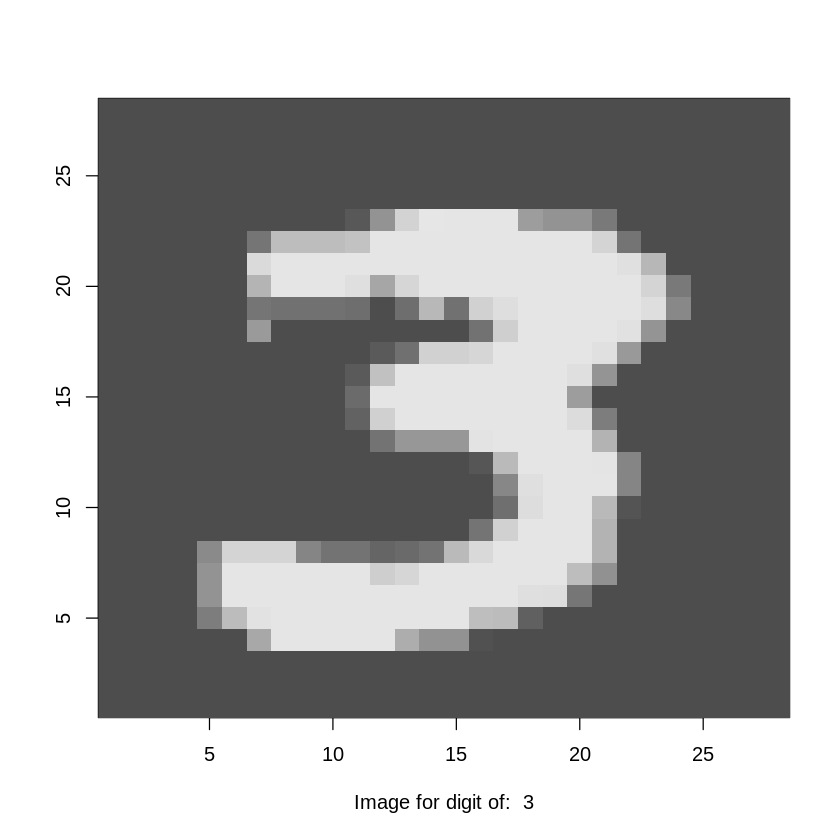

In [5]:
index_image = 28 ## change this index to see different image.
input_matrix <- x_train[index_image,1:28,1:28]
output_matrix <- apply(input_matrix, 2, rev)
output_matrix <- t(output_matrix)
image(1:28, 1:28, output_matrix, col=gray.colors(256), xlab=paste('Image for digit of: ', y_train[index_image]), ylab="")

Here is the original 28x28 matrix for the above image:

In [6]:
input_matrix

0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,80,80,44,0,0,0,0,0,0,0
0,0,0,0,0,0,39,158,158,158,⋯,253,253,210,38,0,0,0,0,0,0
0,0,0,0,0,0,226,253,253,253,⋯,253,253,253,241,146,0,0,0,0,0
0,0,0,0,0,0,139,253,253,253,⋯,253,253,253,253,210,43,0,0,0,0
0,0,0,0,0,0,39,34,34,34,⋯,253,253,253,253,236,64,0,0,0,0
0,0,0,0,0,0,91,0,0,0,⋯,253,253,253,244,81,0,0,0,0,0


# 3 Convolutional Neural Network Model
In this section, we will show how to use Convolutional Neural Network (CNN) for the MNIST handwritten dataset to classcify images into digits. It is exactly the same problem as what we just learnt before, but CNN is a much better deep learning methods for image recognition than a generic deep neural network. CNN leverages the relatinoship among neighbor pixcels in the 2D image for better performance. It also avoids generating thousands or millions of features for high resolution images with full color. This example is described at: https://keras.rstudio.com/articles/examples/mnist_cnn.html

## 3.1 Dataset import and parameter setup
Now let's import the MNIST dataset from scratch again as we have done some preprocessing specifically for a deep neural network model at last section. For CNN, there are different preprocessing steps invovled. We also define a few parameters to be used later.

In [7]:
# Load the mnist data's training and testing dataset
mnist <- dataset_mnist()
x_train <- mnist$train$x
y_train <- mnist$train$y
x_test <- mnist$test$x
y_test <- mnist$test$y

In [8]:
# Define a few parameters to be used in the CNN model
batch_size <- 128
num_classes <- 10
epochs <- 10

# Input image dimensions
img_rows <- 28
img_cols <- 28

# 3.2 Data preprocessing
For CNN method in general, the input of a MxN image is a MxNxK 3D arrays with K specific channels. For example, a greyscale MxN image has only one channel, and the input is MxNx1 tensor. An MXN 8-bit per channel RGB image has three channels with 3 MxN array with values between 0 and 255, so the input is MxNx3 tensor. For the problem that we have now, the image is greyscale, but we need to specifically define there is one channel by reshape the 2D array into 3D tensor using array_reshape(). The input_shape variable will be used in the CNN model later. For RGB color image, the nmber of channels is 3 and we need to replace "1" with "3" for the code cell below if the input image is RGB format.

### 3.2.1 Add channel into the dimension

In [9]:
x_train <- array_reshape(x_train, c(nrow(x_train), img_rows, img_cols, 1))
x_test <- array_reshape(x_test, c(nrow(x_test), img_rows, img_cols, 1))
input_shape <- c(img_rows, img_cols, 1)

Here is the structure of the reshaped image, the first dimension is the image index, the 2-4 dimension is a 3D tensor even though there is only one channel.

In [10]:
str(x_train)

 int [1:60000, 1:28, 1:28, 1] 0 0 0 0 0 0 0 0 0 0 ...


### 3.2.2 Scaling

Same as the DNN model, we scale the input values to be between 0 and 1 for the same numerical stability consideration in the optimization process.

In [11]:
x_train <- x_train / 255
x_test <- x_test / 255

### 3.2.3 Convert response to categorical variable
Same as DNN model, the response variable is converted into categorical.

In [12]:
# Convert class vectors to binary class matrices
y_train <- to_categorical(y_train, num_classes)
y_test <- to_categorical(y_test, num_classes)

## 3.3 Fit a CNN model
As we discussed, CNN model contains a series 2D convolutional layers which contains a few parameters: (1) the kernal_size which is typically 3x3 or 5x5; (2) the number of filters, which corresponding to the number of channels (i.e. the 3rd dimension) in the output tensor; (3) activation funtion. For the first layer, there is also an input_shape parameter which is the input image size and channel. To prevent overfitting and speed up computation, a pooling layer is usually applied after one or a few 2D convolutional layers. A typial pooling of return the maximum of a 2x2 pool_size as the new value in the output which essentially reduce the size to half. Dropout can be used as well in addtion to pooling neighbor values. After a few 2D convolutional layers, we also need 'flattern' the 3D tensor output into 1D tensor, and then add one or a couple of dense layers to connect the output from 2D convolutional layers to the target response classes.

### 3.3.1 Define a CNN model structure
Now we define a CNN model with two 2D convolutional layers with max pooling, and the 2nd layer with additonal dropout to prevent overfitting. Then flatten the output and use two dense layers to connect to the categoires of the image.

In [13]:
# define model structure 
cnn_model <- keras_model_sequential() %>%
  layer_conv_2d(filters = 32, kernel_size = c(3,3), activation = 'relu', input_shape = input_shape) %>% 
  layer_max_pooling_2d(pool_size = c(2, 2)) %>% 
  layer_conv_2d(filters = 64, kernel_size = c(3,3), activation = 'relu') %>% 
  layer_max_pooling_2d(pool_size = c(2, 2)) %>% 
  layer_dropout(rate = 0.25) %>% 
  layer_flatten() %>% 
  layer_dense(units = 128, activation = 'relu') %>% 
  layer_dropout(rate = 0.5) %>% 
  layer_dense(units = num_classes, activation = 'softmax')


In [14]:
summary(cnn_model)

________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
conv2d_1 (Conv2D)                   (None, 26, 26, 32)              320         
________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)      (None, 13, 13, 32)              0           
________________________________________________________________________________
conv2d_2 (Conv2D)                   (None, 11, 11, 64)              18496       
________________________________________________________________________________
max_pooling2d_2 (MaxPooling2D)      (None, 5, 5, 64)                0           
________________________________________________________________________________
dropout_1 (Dropout)                 (None, 5, 5, 64)                0           
________________________________________________________________________________
flatten_1 (Flatten)         

### 3.3.2 Compile the model
Similar to DNN model, we need to compile the defined CNN model.

In [15]:
# Compile model
cnn_model %>% compile(
  loss = loss_categorical_crossentropy,
  optimizer = optimizer_adadelta(),
  metrics = c('accuracy')
)

Train the model and save each epochs's history. Please note, as we are not using GPU, it takes a few minutes to finish. Please be patient while waiting for the results. The training time can be significantly reduced if running on GPU.

### 3.3.3 Train the model
Now, we can train the model with our processed data. Each epochs's history can be saved to track the progress. Please note, as we are not using GPU, it takes a few minutes to finish. Please be patient while waiting for the results. The training time can be significantly reduced if running on GPU.

In [16]:
# Train model
cnn_history <- cnn_model %>% fit(
  x_train, y_train,
  batch_size = batch_size,
  epochs = epochs,
  validation_split = 0.2
)

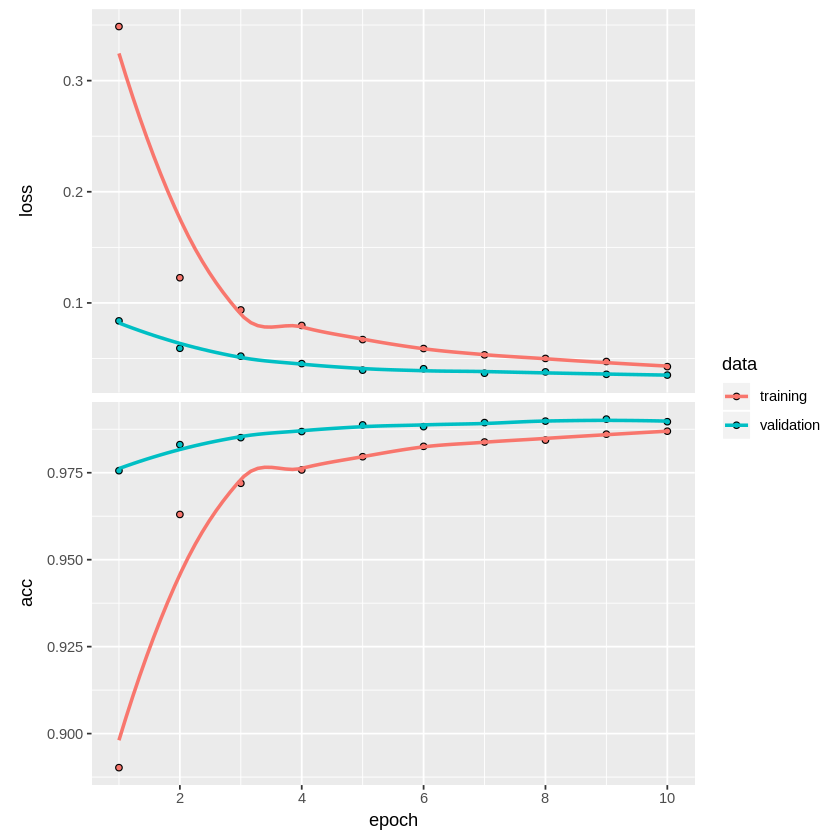

In [17]:
plot(cnn_history)

The trained model accuracy can be evaluated on the testing dataset which is pretty good.

In [18]:
cnn_model %>% evaluate(x_test, y_test)

$loss
[1] 0.0257244

$acc
[1] 0.9905

## 3.4 Model prediction
For any new images, after undergo with the same preprocessing, we can use the trained model to predict which digits the image belongs to.

In [19]:
# model prediction
cnn_pred <- cnn_model %>% 
              predict_classes(x_test)
head(cnn_pred, n=50)

[1] 7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7 1
[39] 2 1 1 7 4 2 3 5 1 2 4 4

## 3.5 Check a few mis-classcified images
Now let's check a few mis-classcified images to see whether human can do a better job than this simple CNN model.

In [20]:
## number of mis-classcified images
sum(cnn_pred != mnist$test$y)

[1] 95

In [21]:
missed_image = mnist$test$x[cnn_pred != mnist$test$y,,]
missed_digit = mnist$test$y[cnn_pred != mnist$test$y]
missed_pred = cnn_pred[cnn_pred != mnist$test$y]

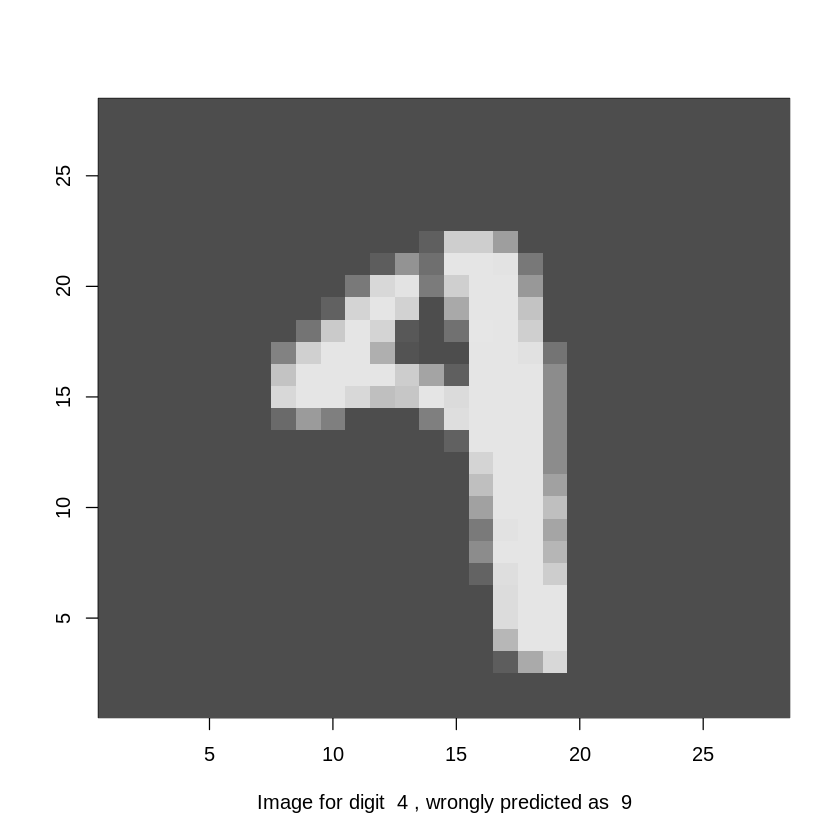

In [22]:
index_image = 6 ## change this index to see different image.
input_matrix <- missed_image[index_image,1:28,1:28]
output_matrix <- apply(input_matrix, 2, rev)
output_matrix <- t(output_matrix)
image(1:28, 1:28, output_matrix, col=gray.colors(256), xlab=paste('Image for digit ', missed_digit[index_image], ', wrongly predicted as ', missed_pred[index_image]), ylab="")